In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression , RidgeCV , ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,LabelEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV , ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [248]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## Dataset Overview

In [249]:
train_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.2875,1.0750,0.3625,19.433582,8.306404,4.309124,6.662133,9.0
1,1,F,1.5500,1.2125,0.4250,33.877653,13.706983,6.676307,10.064072,14.0
2,2,M,1.3875,1.0625,0.3500,23.388337,9.993199,5.556502,5.811648,11.0
3,3,F,1.4375,1.1250,0.4375,27.499015,11.254751,5.329706,7.937860,22.0
4,4,M,1.5250,1.2250,0.4250,32.460178,13.919605,7.569317,8.788345,10.0


In [250]:
test_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,15000,I,1.2875,0.9875,0.3000,15.450477,7.172423,3.331066,4.535920
1,15001,F,1.5625,1.2000,0.4875,34.558040,17.888534,6.973977,9.497082
2,15002,M,1.5625,1.2500,0.4125,30.645809,13.891255,6.137667,9.922325
3,15003,F,1.6250,1.2750,0.4750,42.127357,21.262125,9.171063,9.497082
4,15004,M,1.6125,1.2625,0.4750,42.269104,20.213193,7.781938,11.765042


In [251]:
train_data.shape

(15000, 10)

In [252]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              15000 non-null  int64  
 1   Sex             15000 non-null  object 
 2   Length          15000 non-null  float64
 3   Diameter        15000 non-null  float64
 4   Height          15000 non-null  float64
 5   Weight          15000 non-null  float64
 6   Shucked Weight  15000 non-null  float64
 7   Viscera Weight  15000 non-null  float64
 8   Shell Weight    15000 non-null  float64
 9   Age             15000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [253]:
train_data.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.311821,1.020134,0.346236,23.056144,9.955010,4.978165,6.617204,9.951667
std,4330.271354,0.287776,0.237408,0.090561,12.519632,5.583084,2.768335,3.532174,3.226643
min,0.000000,0.287500,0.000000,0.000000,0.297670,0.127573,0.070874,0.085048,1.000000
25%,3749.750000,1.150000,0.887500,0.287500,13.139993,5.669900,2.792426,3.827183,8.000000
50%,7499.500000,1.375000,1.075000,0.362500,23.437949,9.823102,4.861939,6.803880,10.000000
75%,11249.250000,1.525000,1.200000,0.412500,31.992411,13.891255,6.917278,9.029316,11.000000
max,14999.000000,1.987500,1.712500,0.700000,75.324622,42.184056,17.009700,25.089308,29.000000


In [254]:
train_data.describe(include='object')

,Sex
count,15000
unique,3
top,M
freq,5497


In [255]:
train_data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [256]:
train_data.duplicated().sum()

np.int64(0)

In [257]:
train_data = train_data.drop('id',axis=1)
test_data_with_id = test_data[['id']]
test_data = test_data.drop('id',axis=1)


In [258]:
train_data['Age'].value_counts()

Age
9.0     2485
10.0    2287
8.0     2013
11.0    1750
7.0     1434
12.0     940
6.0      871
13.0     770
14.0     490
5.0      411
15.0     362
4.0      227
17.0     223
16.0     204
18.0     139
19.0     119
20.0      85
21.0      53
3.0       40
22.0      30
23.0      30
24.0      13
27.0       5
25.0       5
1.0        5
29.0       5
26.0       2
2.0        2
Name: count, dtype: int64

# Correlation

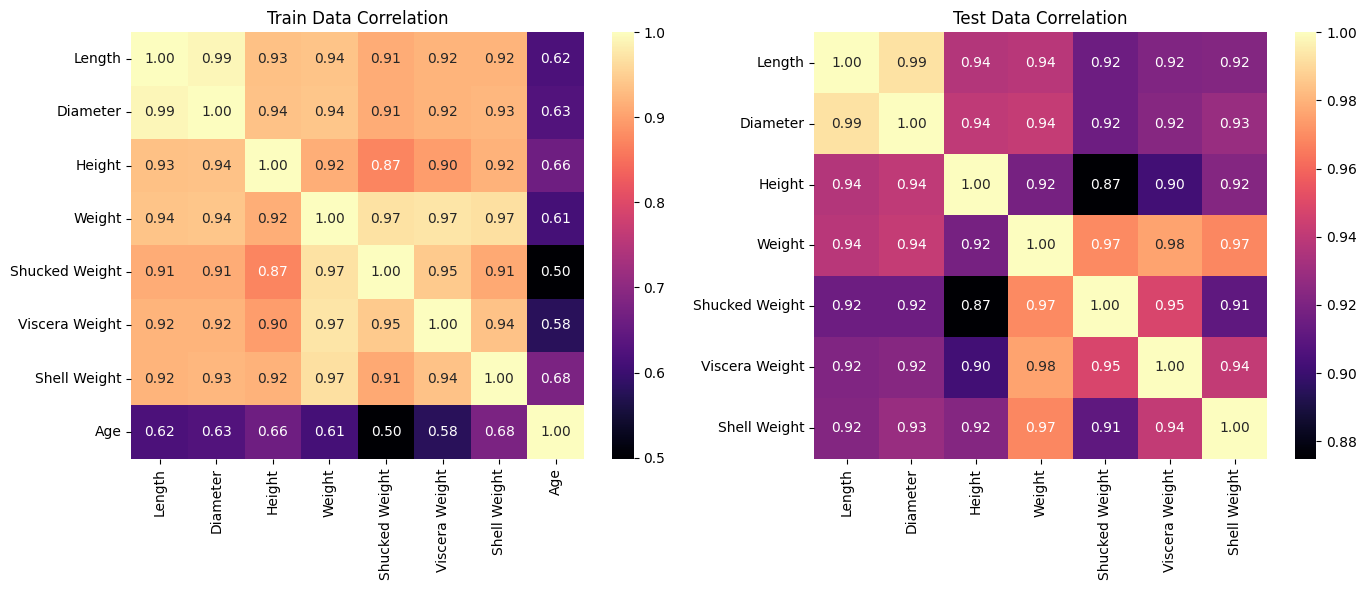

In [259]:
train_numerical = train_data.select_dtypes(include=['number'])
test_numerical = test_data.select_dtypes(include=['number'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot correlation matrix for train_data
sns.heatmap(train_numerical.corr(), annot=True, fmt=".2f", cmap="magma", ax=axes[0])
axes[0].set_title("Train Data Correlation")

# Plot correlation matrix for test_data
sns.heatmap(test_numerical.corr(), annot=True, fmt=".2f", cmap="magma", ax=axes[1])
axes[1].set_title("Test Data Correlation")
plt.tight_layout()
plt.show()

# Histogram

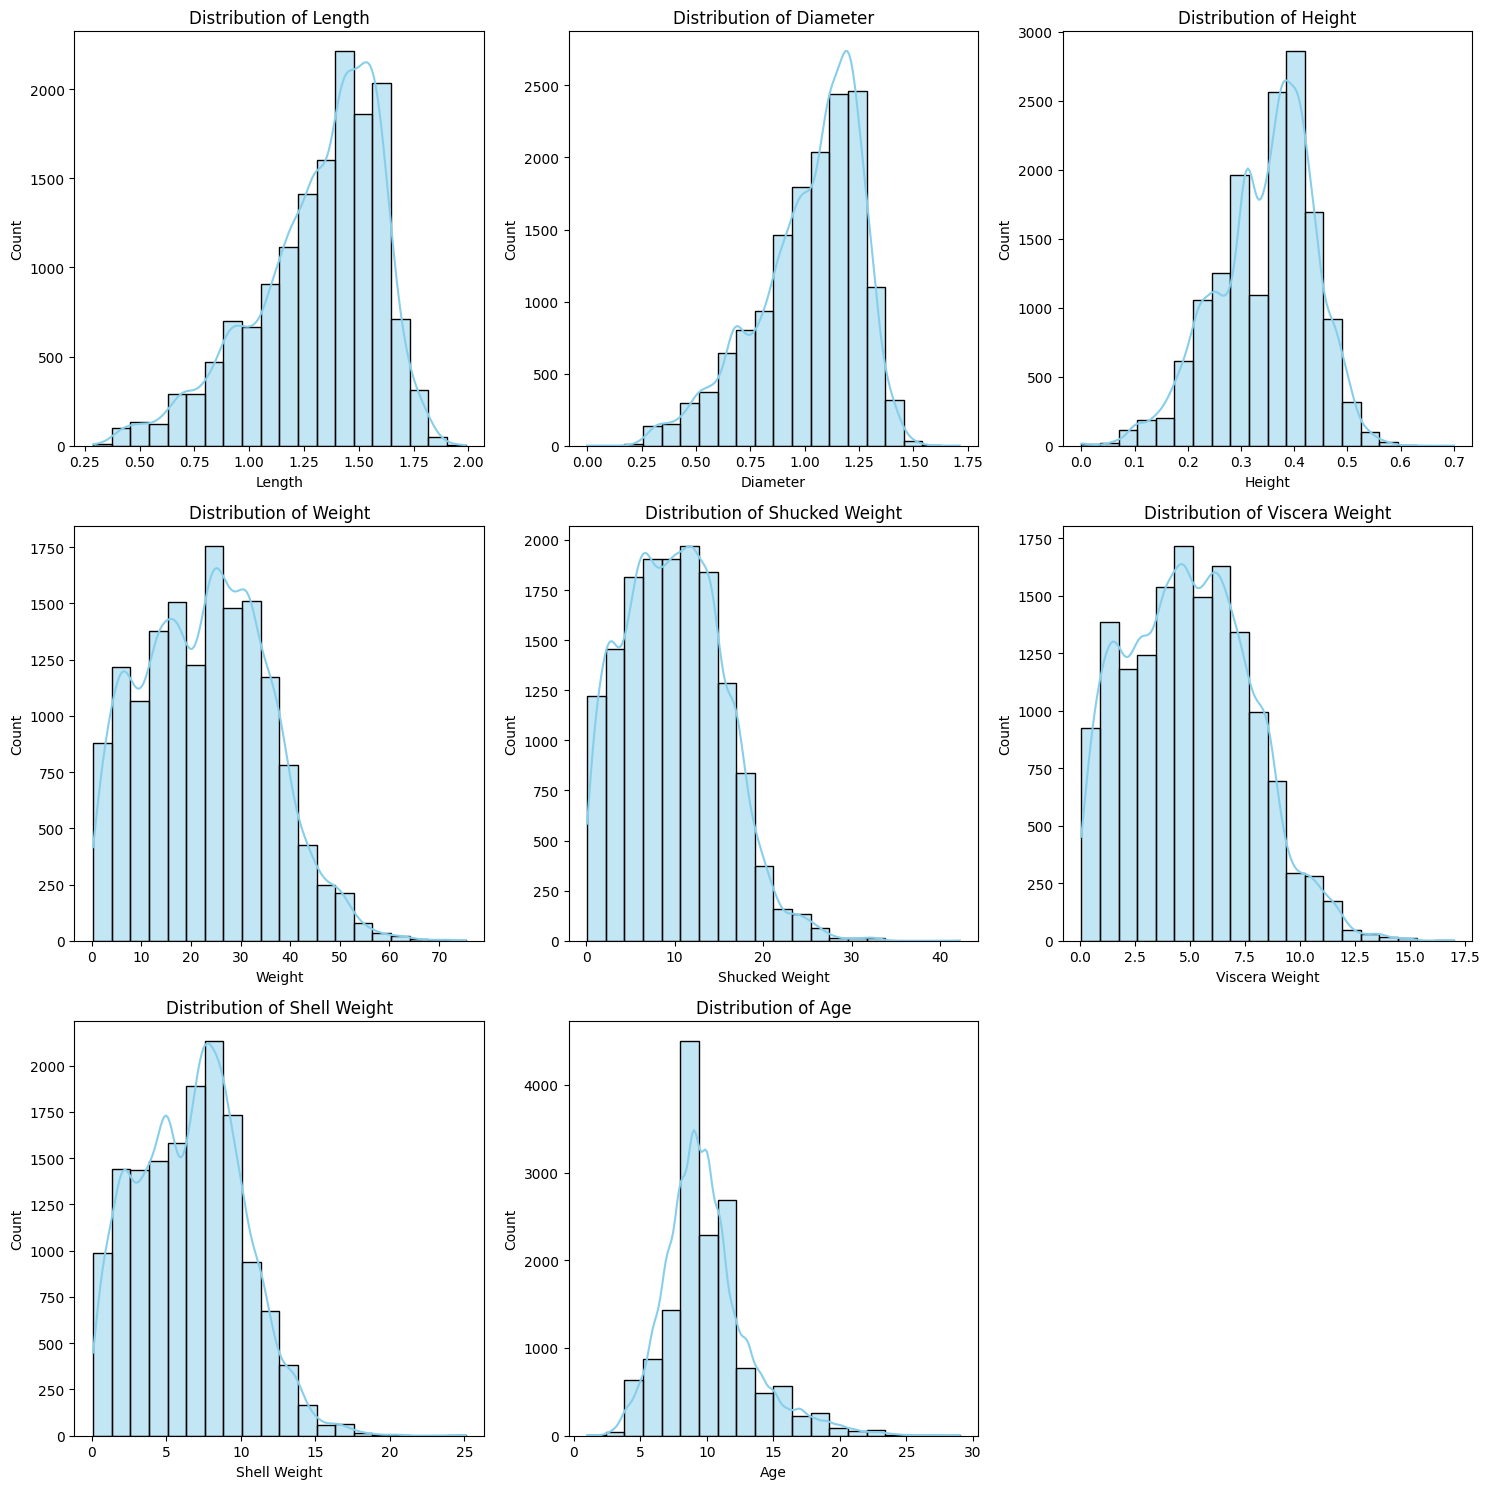

In [260]:
numerical_columns = train_data.select_dtypes(include='number').columns

num_columns = 3
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

plt.figure(figsize=(15, 5 * num_rows))

for idx, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, idx + 1)
    sns.histplot(train_data[col], kde=True, bins=20, color='skyblue', edgecolor='black') 
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

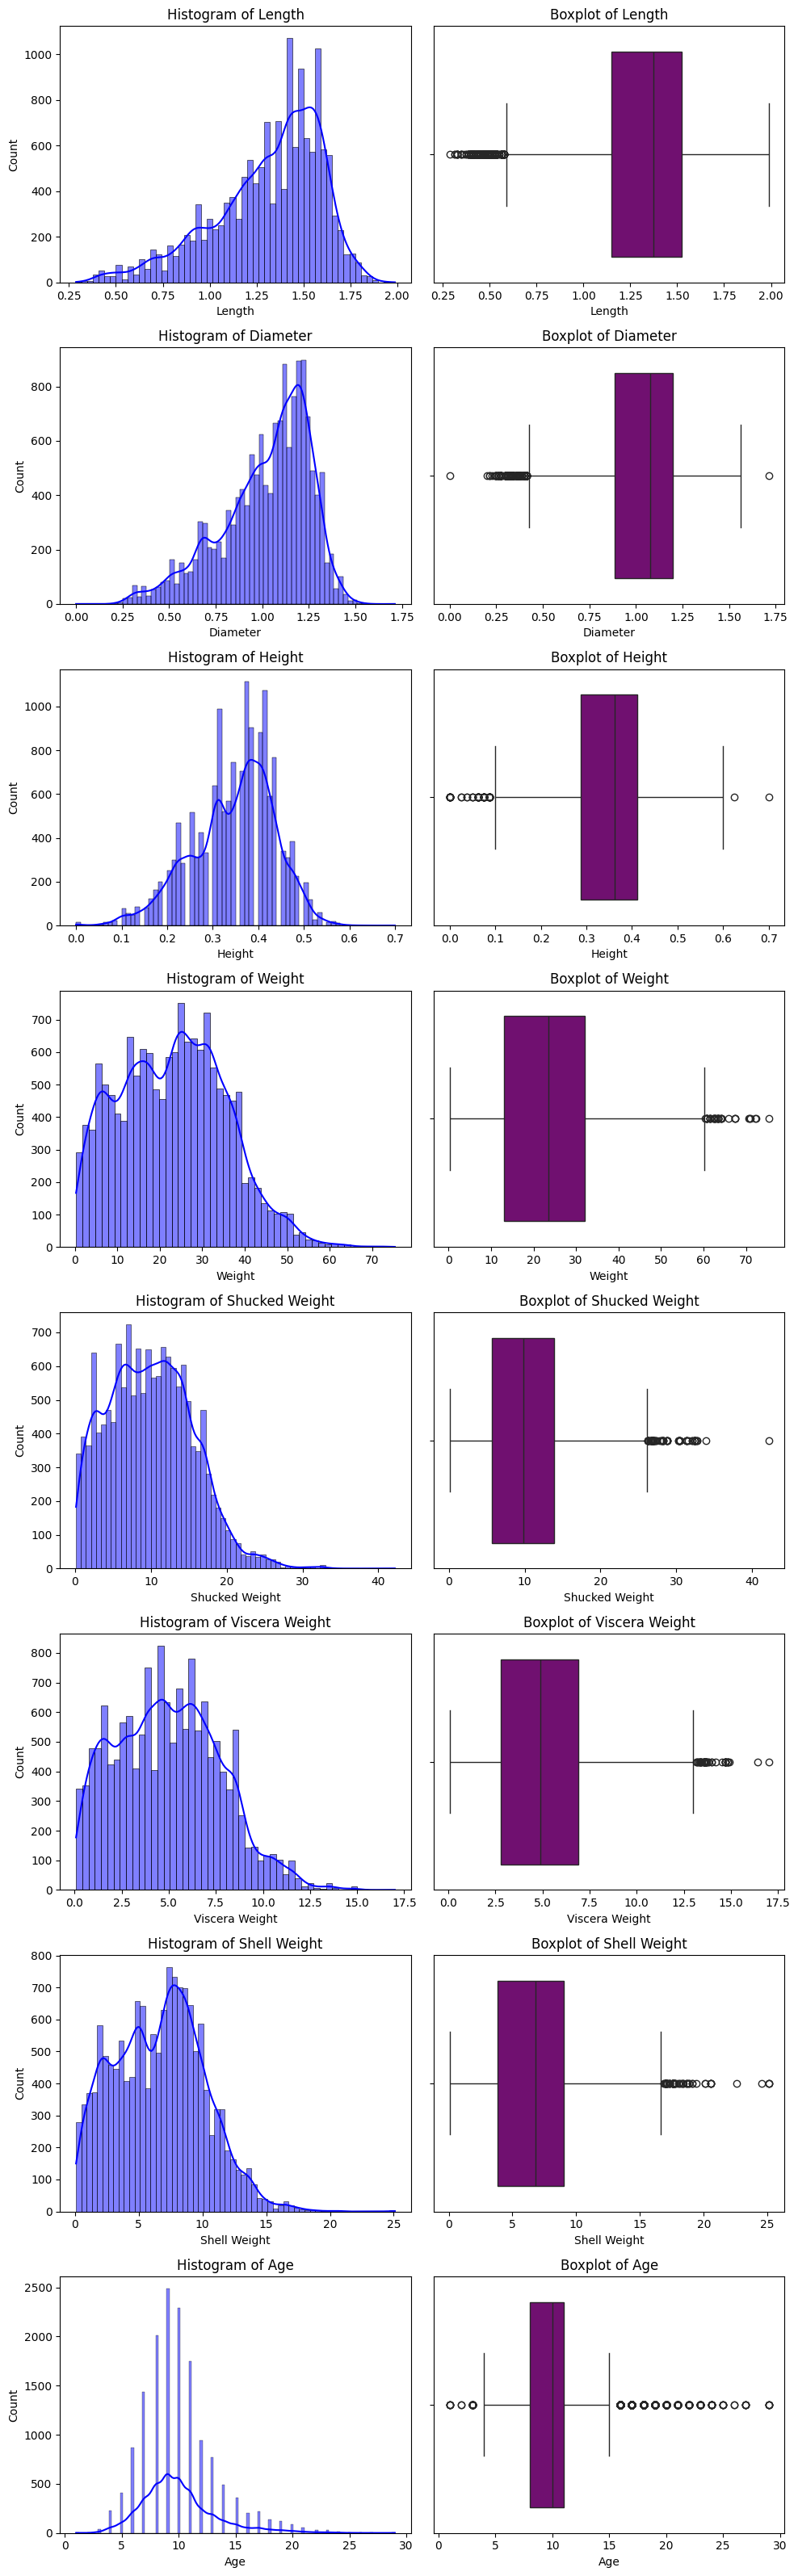

In [261]:
num_cols_count = len(numerical_columns)
n_rows = num_cols_count
fig, axs = plt.subplots(n_rows, 2, figsize=(10, n_rows*4))
for idx, col in enumerate(numerical_columns):
    sns.histplot(data=train_data, x=col, kde=True, ax=axs[idx, 0], color='blue')
    axs[idx, 0].set_title(f'Histogram of {col}')

    sns.boxplot(data=train_data, x=col, ax=axs[idx, 1],color='purple')
    axs[idx, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

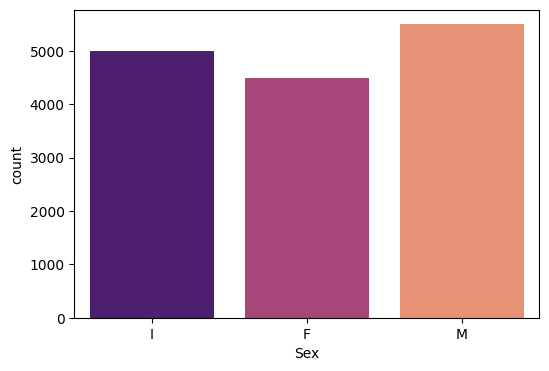

In [262]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data['Sex'], palette='magma')
plt.show()


# Target Variable Distribution

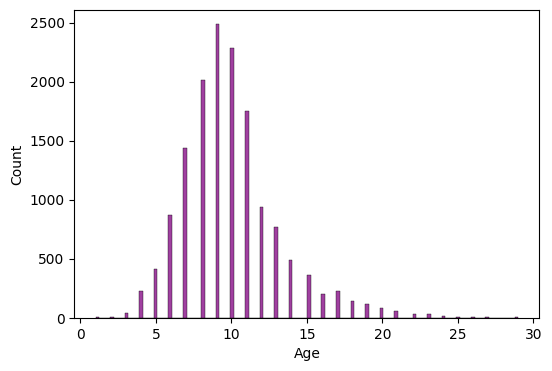

In [263]:
plt.figure(figsize=(6,4))
sns.histplot(train_data['Age'],color='purple',edgecolor='black')
plt.show()

# Outlier Detection

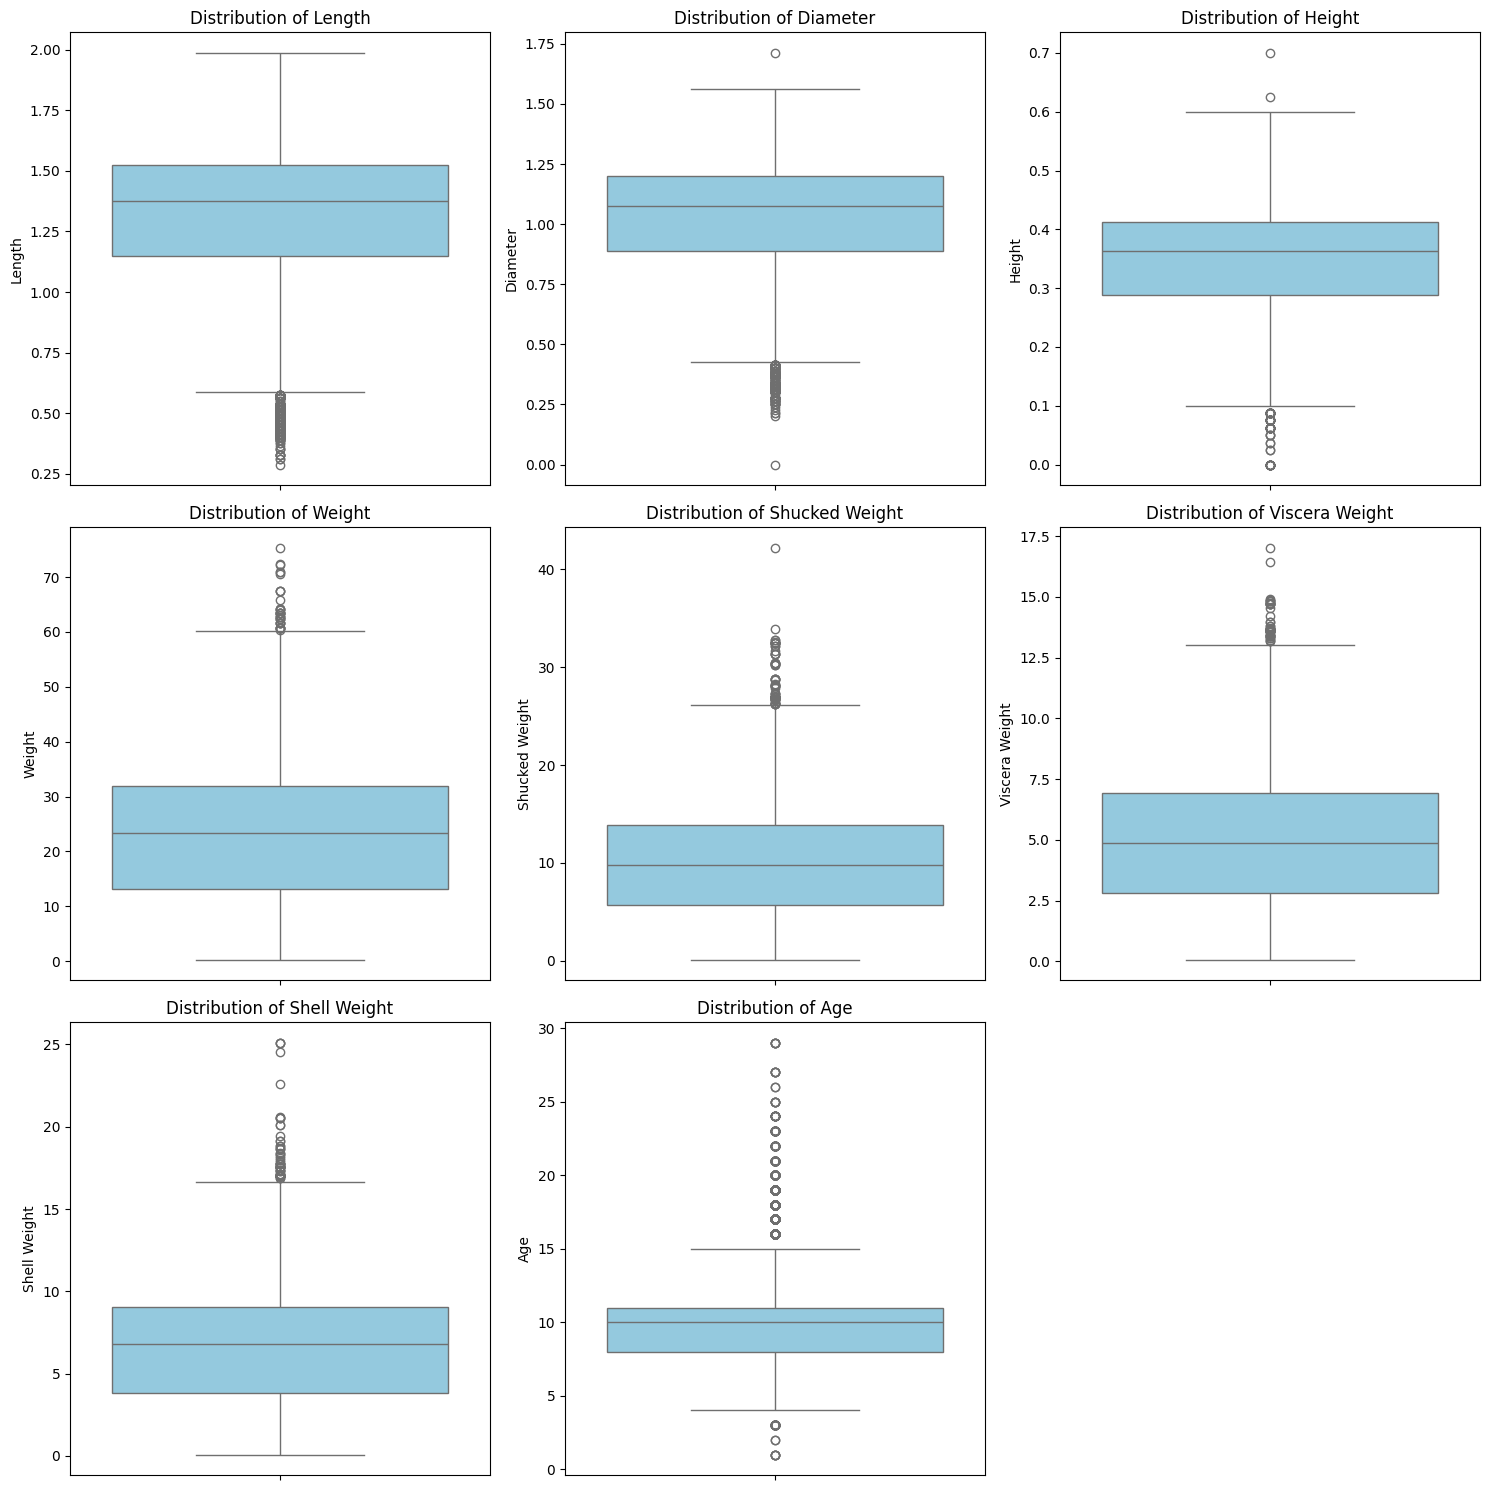

In [264]:
numerical_columns = train_data.select_dtypes(include='number').columns

num_columns = 3
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

plt.figure(figsize=(15, 5 * num_rows))

for idx, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, idx + 1)
    sns.boxplot(train_data[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [265]:
def remove_outliers(data, columns):

  Q1 = data[columns].quantile(0.25)
  Q3 = data[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  filtered = data[(data[columns] >= lower_bound).all(axis=1) & (data[columns] <= upper_bound).all(axis=1)]
  return filtered

In [266]:
print(train_data.shape)
train_data = remove_outliers(train_data, ['Weight'])
train_data = remove_outliers(train_data, ['Viscera Weight'])
train_data = remove_outliers(train_data, ['Shell Weight'])
print(train_data.shape)

(15000, 9)
(14889, 9)


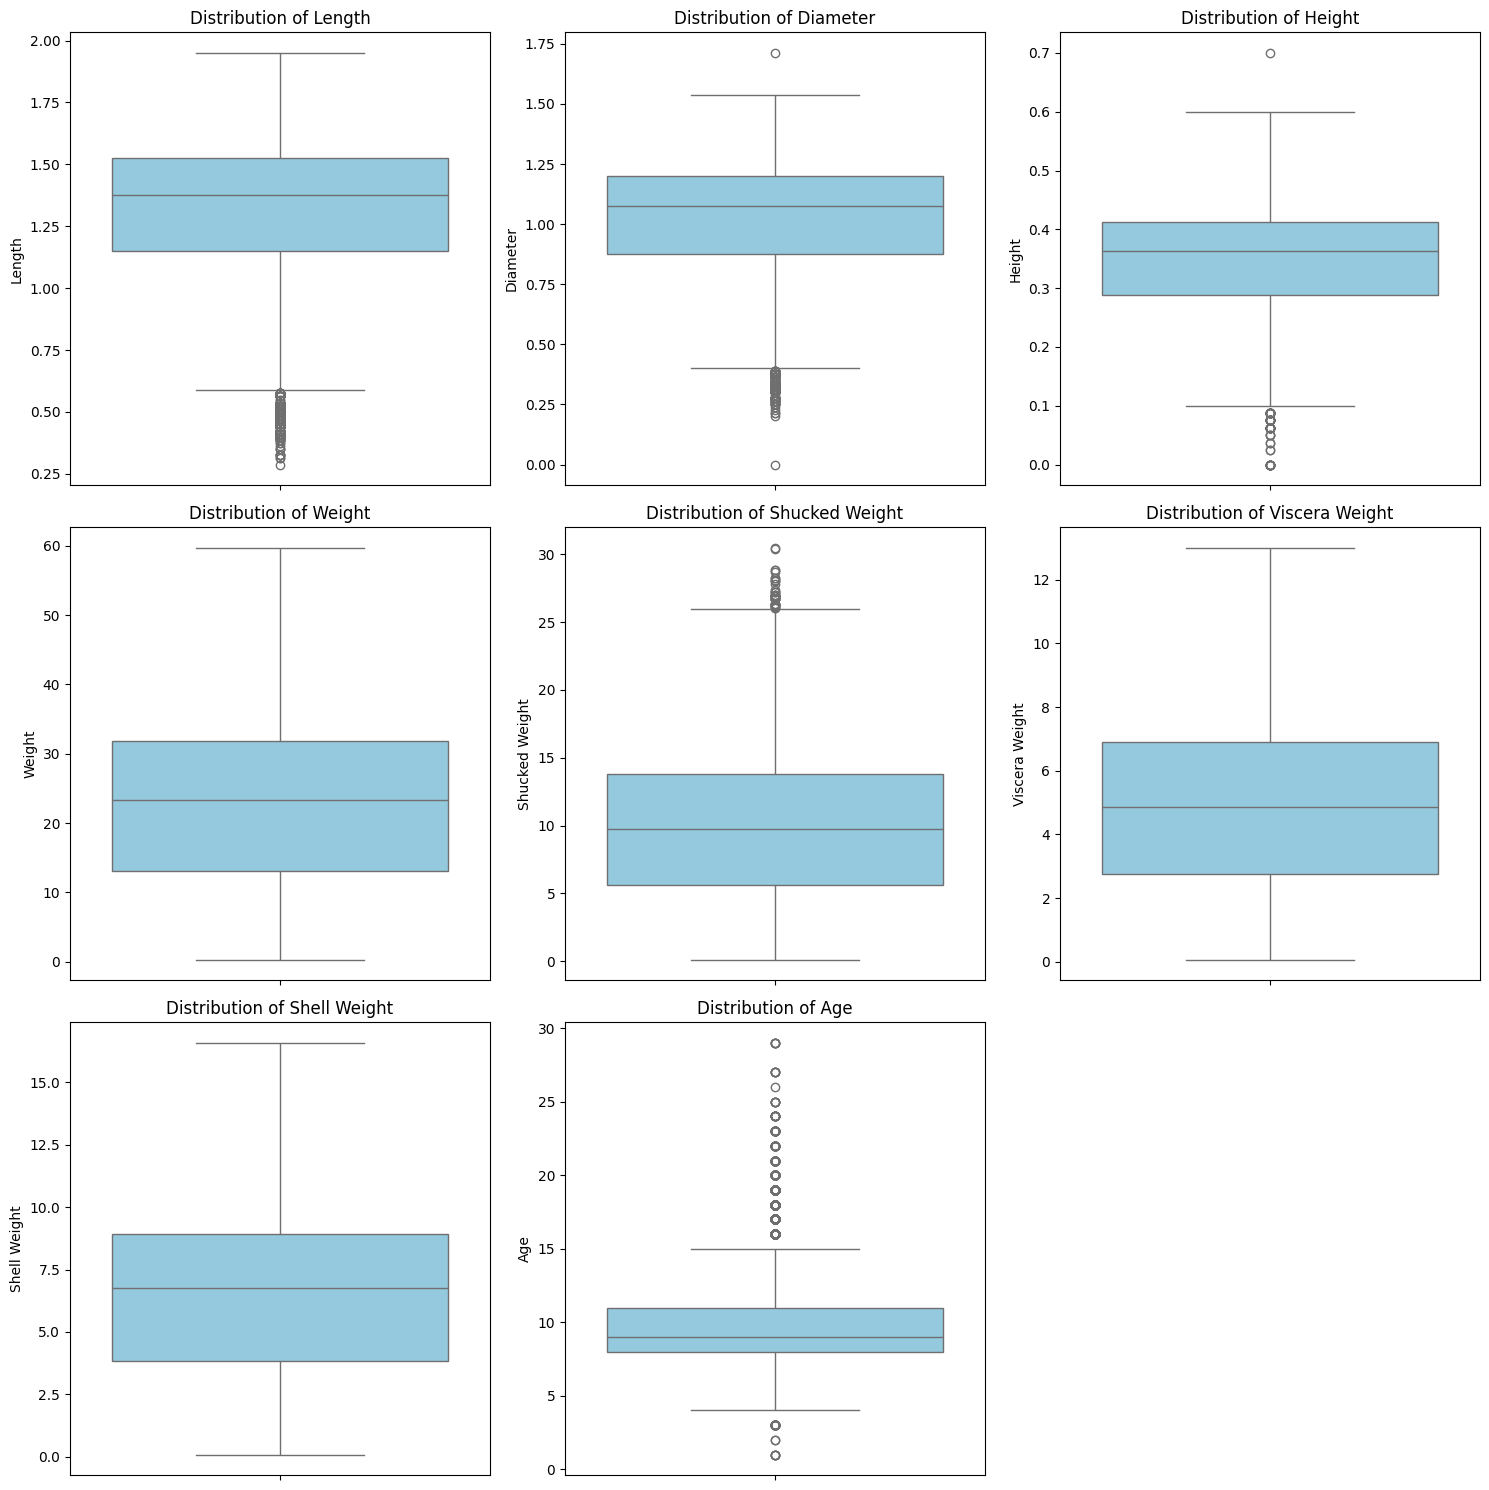

In [267]:
num_columns = 3
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

plt.figure(figsize=(15, 5 * num_rows))

for idx, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_columns, idx + 1)
    sns.boxplot(train_data[col], color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [268]:
train_data['Sex'] = train_data['Sex'].map({'M': 1, 'F': 2,'I' : 3})
test_data['Sex'] = test_data['Sex'].map({'M': 1, 'F': 2,'I' : 3})

print(train_data['Sex'].head())
print(test_data['Sex'].head())

0    3
1    2
2    1
3    2
4    1
Name: Sex, dtype: int64
0    3
1    2
2    1
3    2
4    1
Name: Sex, dtype: int64


In [269]:
train_data['Sex'].unique()
test_data['Sex'].unique()

array([3, 2, 1])

## Imputing values where height is equal to zero

In [270]:
height_train_zero_count = train_data[train_data['Height'] == 0].shape[0]
height_test_zero_count = test_data[test_data['Height'] == 0].shape[0]
print(height_train_zero_count)
print(height_test_zero_count)

14
6


In [271]:
h1 = train_data[train_data["Height"] != 0]
h0 = train_data[train_data["Height"] == 0]
print(h1.shape, h0.shape)

x_h1 = h1.drop(columns=["Height", "Age"], axis=1)
y_h1 = h1["Height"]
x_h0 = h0.drop(columns=["Height", "Age"], axis=1)

rfr = RandomForestRegressor(n_jobs=-1, random_state=28)
rfr.fit(x_h1, y_h1)
preds_height = rfr.predict(x_h0)

cnt = 0
for i in train_data.index:  
    if train_data.loc[i, "Height"] == 0:  
        train_data.loc[i, "Height"] = preds_height[cnt] 
        cnt += 1 


print("Updated Train Data Height Description After Fixing:")
print(train_data["Height"].describe())

(14875, 9) (14, 9)
Updated Train Data Height Description After Fixing:
count    14889.000000
mean         0.345117
std          0.089296
min          0.025000
25%          0.287500
50%          0.362500
75%          0.412500
max          0.700000
Name: Height, dtype: float64


In [272]:
test_h0 = test_data[test_data["Height"] == 0]


x_test_h0 = test_h0.drop(columns=["Height"], axis=1)  

preds_test_height = rfr.predict(x_test_h0)

cnt = 0
for index, row in test_data.iterrows():
    if row["Height"] == 0:
        test_data.loc[index, "Height"] = preds_test_height[cnt]
        cnt += 1


print("Updated Test Data Height Description After Fixing:")
print(test_data["Height"].describe())

Updated Test Data Height Description After Fixing:
count    10000.000000
mean         0.345581
std          0.091172
min          0.012500
25%          0.287500
50%          0.362500
75%          0.412500
max          0.600000
Name: Height, dtype: float64


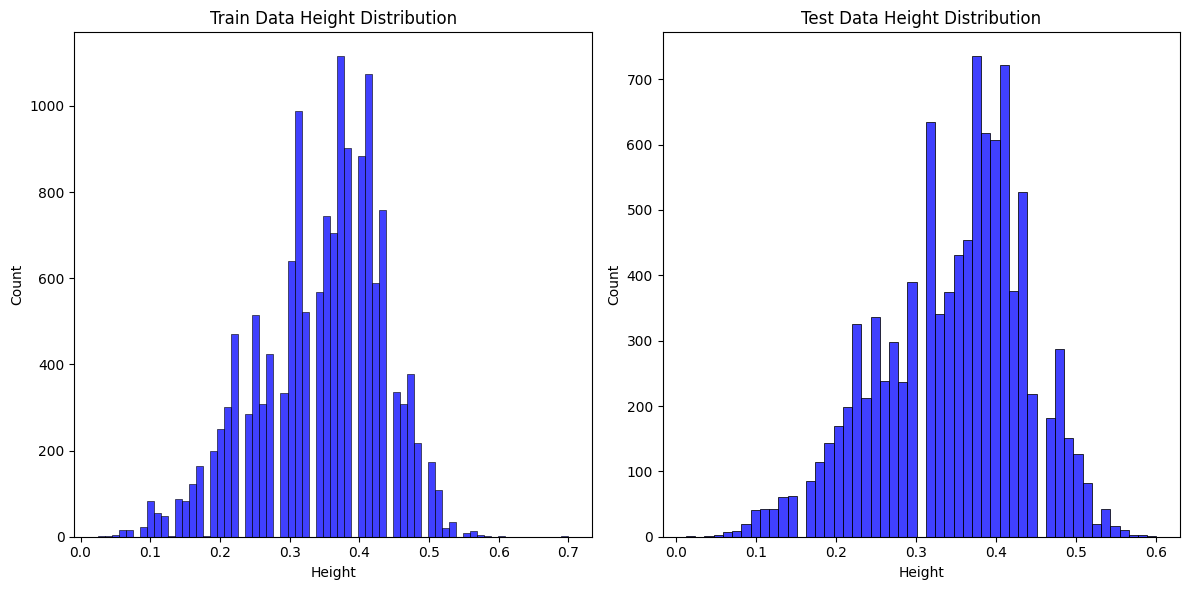

In [273]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  

sns.histplot(train_data['Height'], color='blue', ax=ax[0])
sns.histplot(test_data['Height'], color='blue', ax=ax[1])

ax[0].set_title('Train Data Height Distribution')
ax[1].set_title('Test Data Height Distribution')

plt.tight_layout()
plt.show()


In [274]:
age_counts = train_data['Age'].value_counts()

total_age_count = len(train_data['Age'])

weight = age_counts / total_age_count

print(weight)

Age
9.0     0.166633
10.0    0.153133
8.0     0.135200
11.0    0.116126
7.0     0.096313
12.0    0.062462
6.0     0.058500
13.0    0.050843
14.0    0.032037
5.0     0.027604
15.0    0.024045
4.0     0.015246
17.0    0.014373
16.0    0.013164
18.0    0.008933
19.0    0.007657
20.0    0.005239
21.0    0.003425
3.0     0.002687
22.0    0.002015
23.0    0.002015
24.0    0.000806
27.0    0.000336
25.0    0.000336
29.0    0.000336
1.0     0.000336
2.0     0.000134
26.0    0.000067
Name: count, dtype: float64


In [275]:
def weighted_round(predictions, age_counts, weight):
    rounded_preds = []
    ages = age_counts.index
    for pred in predictions:
        weighted_diff = abs(ages - pred) * (1 - weight)
        closest_age = ages[np.argmin(weighted_diff)]
        rounded_preds.append(closest_age)

    return np.array(rounded_preds)

In [276]:
X = train_data.drop('Age', axis=1)
y = train_data['Age']

In [277]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [278]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2 ,random_state=42)

## Models : Linear Regression, Lasso, Ridge, & ElasticNet

# Linear Regression

In [280]:
linear_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_model.fit(X_train, y_train)

y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

y_pred_test_weighted = weighted_round(y_pred_test, age_counts, weight)
y_pred_train_weighted = weighted_round(y_pred_train, age_counts, weight)

mae_test = mean_absolute_error(y_test, y_pred_test_weighted)
mae_train = mean_absolute_error(y_train, y_pred_train_weighted)
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')

Train MAE: 1.3141633783897237
Test MAE: 1.3243787777031564


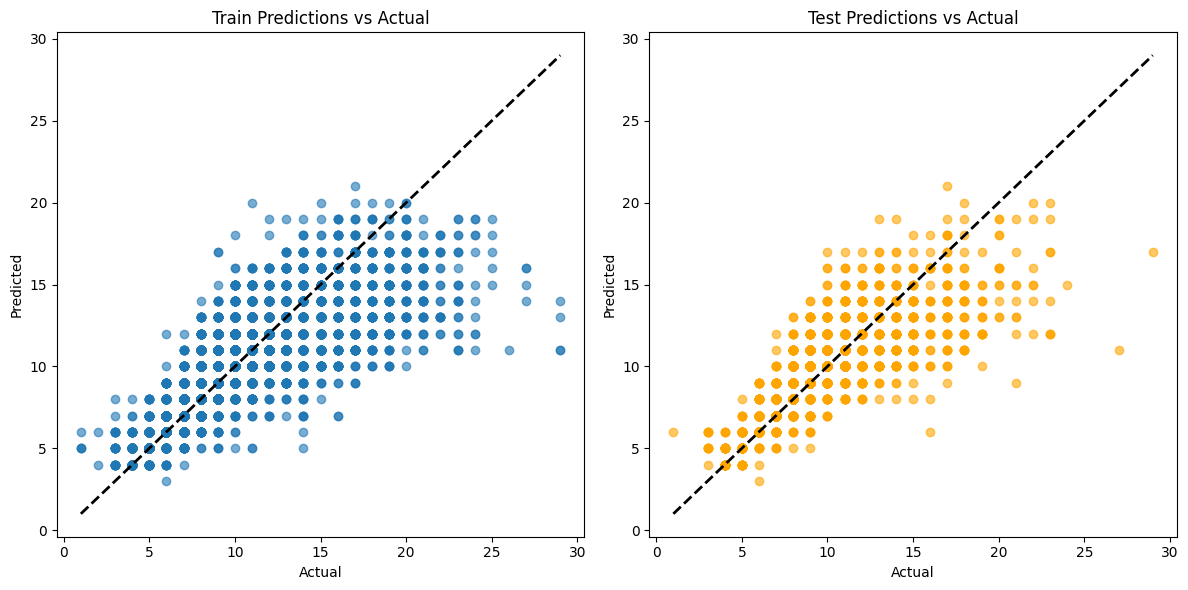

In [281]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_weighted, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_weighted, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

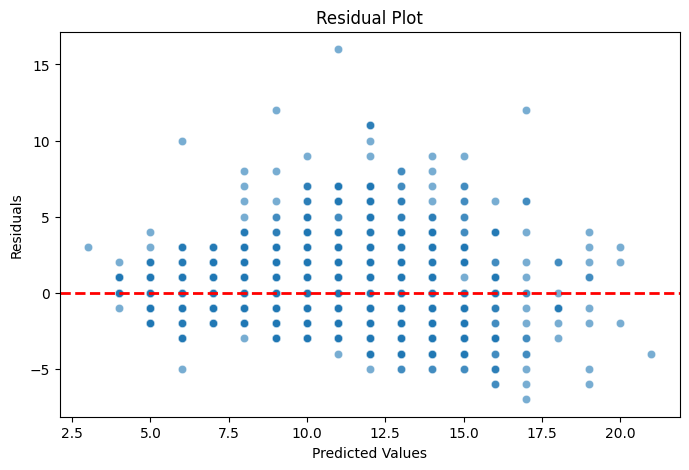

In [282]:
residuals = y_test - y_pred_test_weighted

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_weighted, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

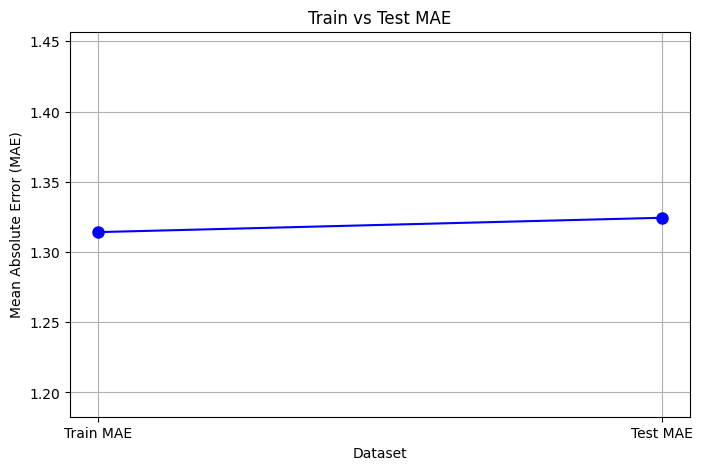

In [283]:
mae_values = [mae_train, mae_test]
labels = ['Train MAE', 'Test MAE']

plt.figure(figsize=(8, 5))
plt.plot(labels, mae_values, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel("Dataset")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Train vs Test MAE")
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)  # Adjust y-axis limits for better visibility
plt.grid(True)
plt.show()

# LassoCv

In [284]:
lassoCv_model = LassoCV(eps=0.1, n_alphas=100, cv=5,random_state=42)
lassoCv_model.fit(X_train, y_train)

y_pred_test = lassoCv_model.predict(X_test)
y_pred_train = lassoCv_model.predict(X_train)

y_pred_test_weighted = weighted_round(y_pred_test, age_counts, weight)
y_pred_train_weighted = weighted_round(y_pred_train, age_counts, weight)

mae_test = mean_absolute_error(y_test, y_pred_test_weighted)
mae_train = mean_absolute_error(y_train, y_pred_train_weighted)
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')

Train MAE: 1.7357904458063975
Test MAE: 1.7276695768972465


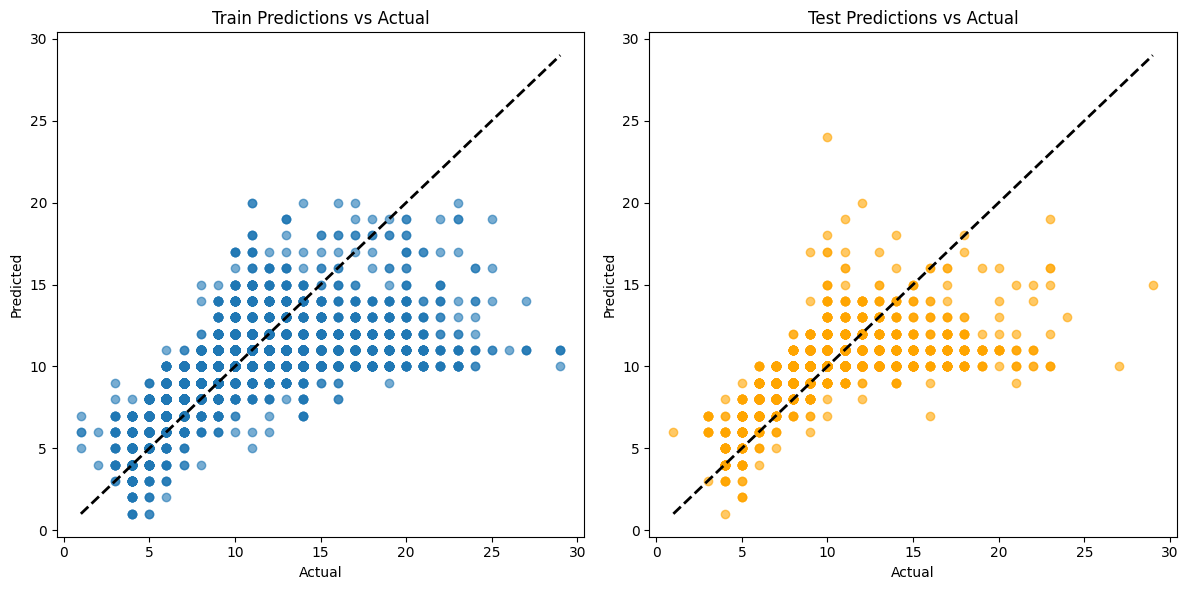

In [285]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_weighted, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_weighted, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

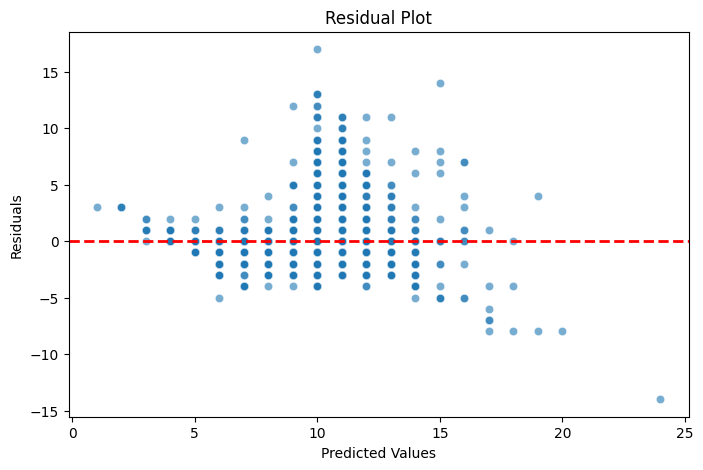

In [286]:
residuals = y_test - y_pred_test_weighted

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_weighted, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

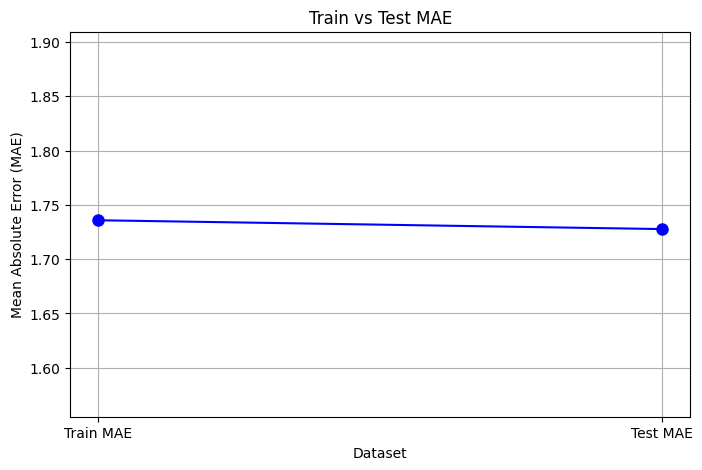

In [287]:
mae_values = [mae_train, mae_test]
labels = ['Train MAE', 'Test MAE']

plt.figure(figsize=(8, 5))
plt.plot(labels, mae_values, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel("Dataset")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Train vs Test MAE")
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)  # Adjust y-axis limits for better visibility
plt.grid(True)
plt.show()

# RidgeCv

In [288]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5)
ridge_model.fit(X_train, y_train)

y_pred_test = ridge_model.predict(X_test)
y_pred_train = ridge_model.predict(X_train)

y_pred_test_weighted = weighted_round(y_pred_test, age_counts, weight)
y_pred_train_weighted = weighted_round(y_pred_train, age_counts, weight)

mae_test = mean_absolute_error(y_test, y_pred_test_weighted)
mae_train = mean_absolute_error(y_train, y_pred_train_weighted)
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')

Train MAE: 1.3231466711443203
Test MAE: 1.3233713901947617


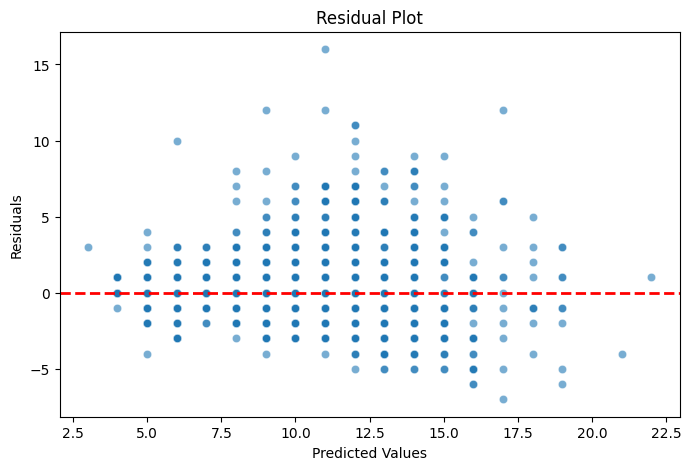

In [289]:
residuals = y_test - y_pred_test_weighted

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_weighted, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


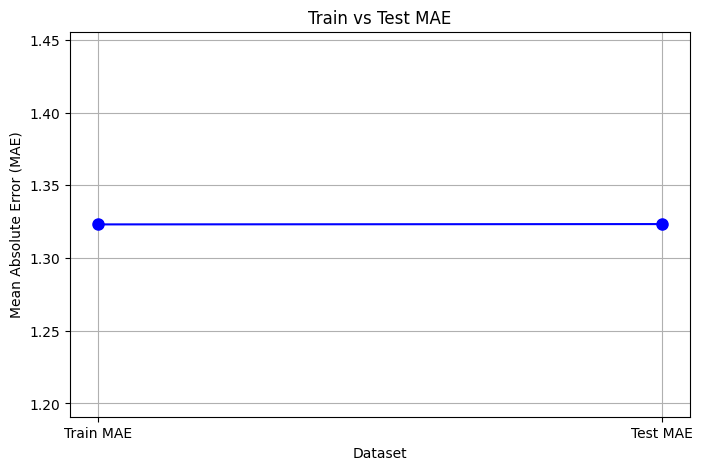

In [290]:
mae_values = [mae_train, mae_test]
labels = ['Train MAE', 'Test MAE']

plt.figure(figsize=(8, 5))
plt.plot(labels, mae_values, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel("Dataset")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Train vs Test MAE")
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)  # Adjust y-axis limits for better visibility
plt.grid(True)
plt.show()

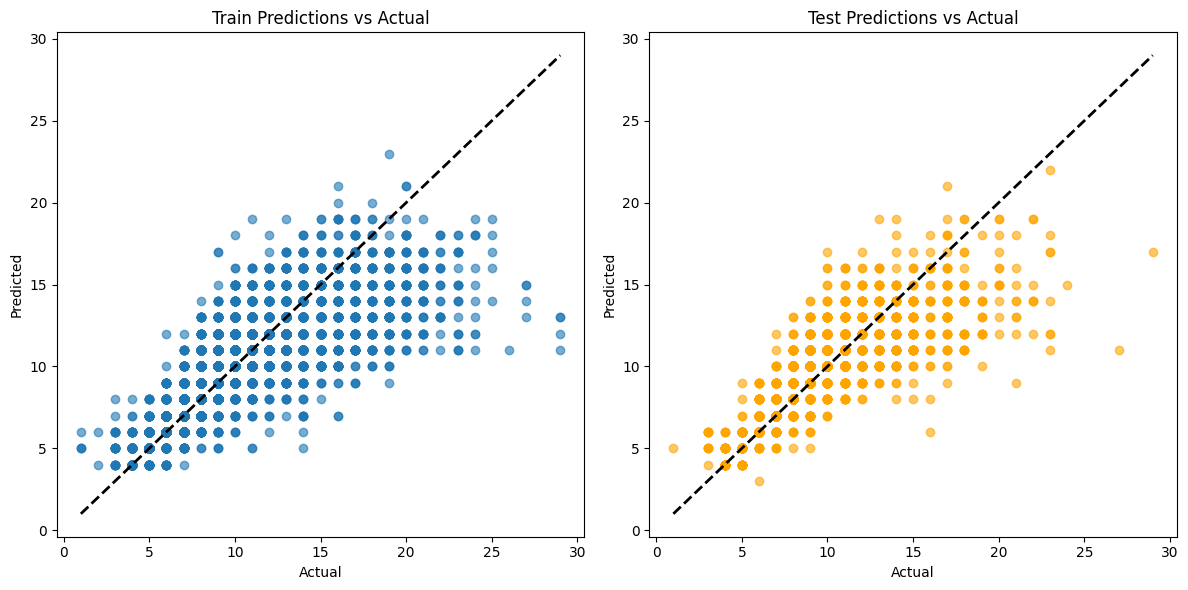

In [291]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_weighted, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_weighted, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

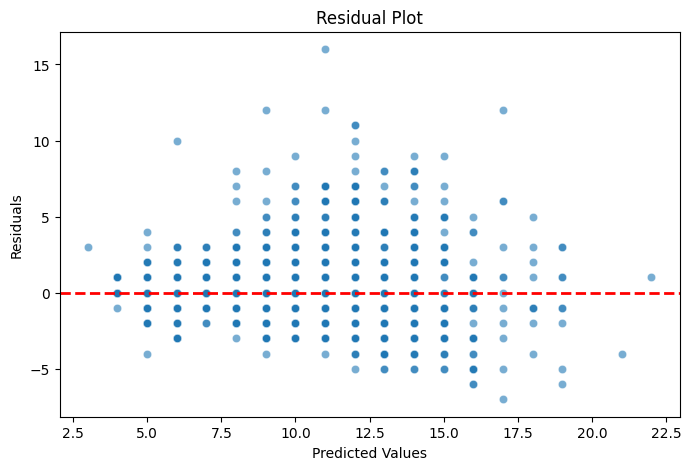

In [292]:
residuals = y_test - y_pred_test_weighted

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_weighted, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


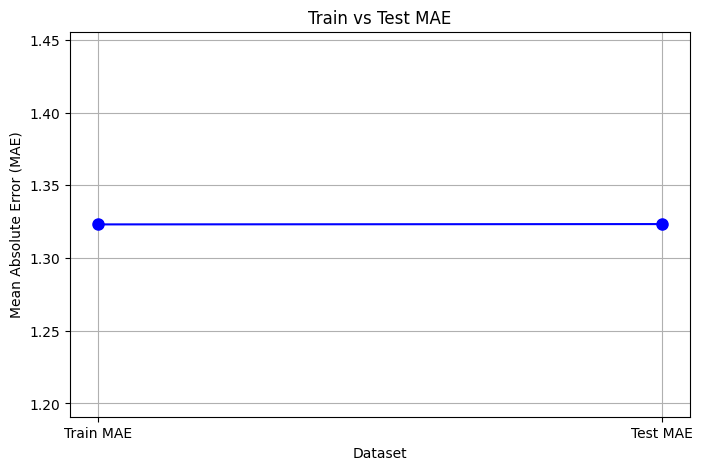

In [293]:
mae_values = [mae_train, mae_test]
labels = ['Train MAE', 'Test MAE']

plt.figure(figsize=(8, 5))
plt.plot(labels, mae_values, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel("Dataset")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Train vs Test MAE")
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)  # Adjust y-axis limits for better visibility
plt.grid(True)
plt.show()


# ElasticNetCv

In [294]:
best_elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.1)
best_elastic_net.fit(X_train, y_train)

y_pred_test = best_elastic_net.predict(X_test)
y_pred_train = best_elastic_net.predict(X_train)


y_pred_test_weighted = weighted_round(y_pred_test, age_counts, weight)
y_pred_train_weighted = weighted_round(y_pred_train, age_counts, weight)

mae_test = mean_absolute_error(y_test, y_pred_test_weighted)
mae_train = mean_absolute_error(y_train, y_pred_train_weighted)
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')



Train MAE: 1.3275963395180925
Test MAE: 1.3206850235057086


In [295]:
mae_cv = -cross_val_score(best_elastic_net, X_poly, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-Validation MAE scores: {mae_cv}')
print(f'Mean MAE: {mae_cv.mean()}')


Cross-Validation MAE scores: [1.36084529 1.37114542 1.39274696 1.36047059 1.3542304 ]
Mean MAE: 1.3678877307590094


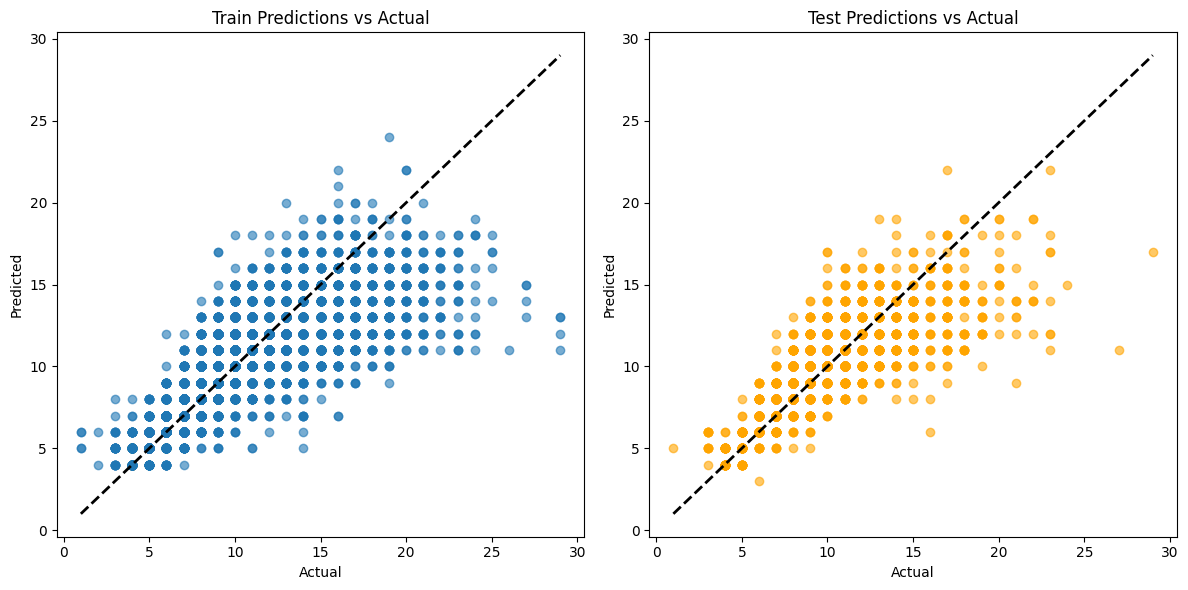

In [296]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_weighted, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_weighted, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


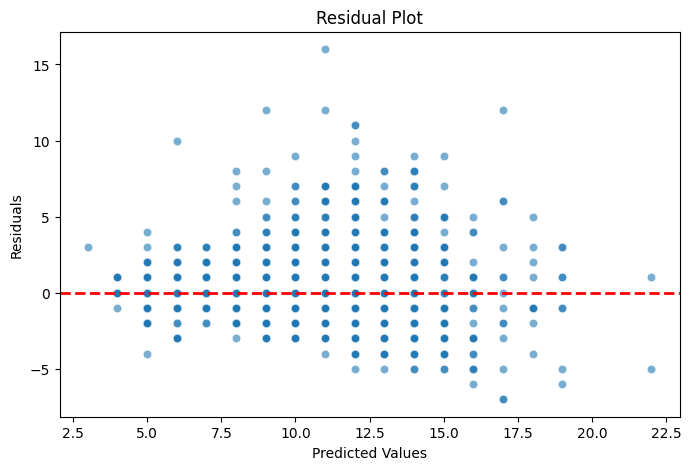

In [297]:
residuals = y_test - y_pred_test_weighted

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_test_weighted, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


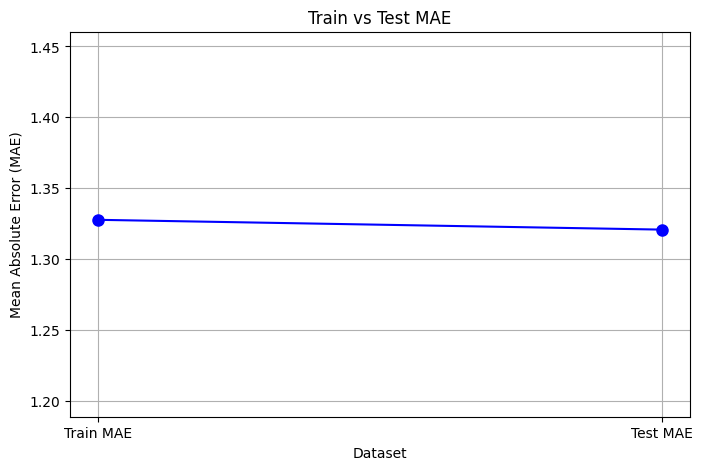

In [298]:
mae_values = [mae_train, mae_test]
labels = ['Train MAE', 'Test MAE']

plt.figure(figsize=(8, 5))
plt.plot(labels, mae_values, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel("Dataset")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Train vs Test MAE")
plt.ylim(min(mae_values) * 0.9, max(mae_values) * 1.1)  # Adjust y-axis limits for better visibility
plt.grid(True)
plt.show()


# Submission

In [299]:

X_scaled = scaler.transform(test_data)
X_poly = poly.transform(X_scaled)
predictions = weighted_round(ridge_model.predict(X_poly), age_counts, weight)
submission = pd.DataFrame({'id': test_data_with_id['id'], 'Age': predictions})
submission.to_csv('submission.csv', index=False)


In [300]:
submission.head(25)

,id,Age
0,15000,8.0
1,15001,10.0
2,15002,11.0
3,15003,10.0
4,15004,12.0
5,15005,7.0
6,15006,13.0
7,15007,9.0
8,15008,10.0
9,15009,9.0
